<a href="https://colab.research.google.com/github/22MIS1002/BIG_DATA_DA2/blob/main/BDA_DA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Necessary Libraries

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=303d0e528ff841f0f761324c89d766fbb9cf67b2f89638ab9e7811e871b4d9ec
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


# Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import matplotlib.pyplot as plt


# Load the Dataset

In [3]:
# Load dataset
data = pd.read_csv('Mall_Customers.csv')

# We are using the 'Annual Income' and 'Spending Score' columns for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

print("Dataset sample:\n", data.head())


Dataset sample:
    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# Data Preprocessing

In [4]:
# Scale the data to be between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled Data (First 5 Rows):\n", X_scaled[:5])


Scaled Data (First 5 Rows):
 [[0.         0.3877551 ]
 [0.         0.81632653]
 [0.00819672 0.05102041]
 [0.00819672 0.7755102 ]
 [0.01639344 0.39795918]]


# Initialize and Train the SOM

In [5]:
# Initialize the SOM with a grid size of 10x10
som = MiniSom(x=10, y=10, input_len=2, sigma=1.0, learning_rate=0.5)

# Initialize the weights randomly
som.random_weights_init(X_scaled)

# Train the SOM for 1000 iterations
som.train_random(X_scaled, 1000)

print("SOM Training Completed.")


SOM Training Completed.


# Map the Data to the SOM Grid

In [6]:
# Map data points to their winning nodes
mappings = som.win_map(X_scaled)

print("Data points mapped to SOM nodes.")


Data points mapped to SOM nodes.


# Retrieve Clusters (Nodes)

In [7]:
# Retrieve customers from specific clusters (nodes)
cluster_1 = mappings.get((9, 0), [])  # Cluster at node (9,0)
cluster_2 = mappings.get((6, 6), [])  # Cluster at node (6,6)
cluster_3 = mappings.get((4, 4), [])  # Cluster at node (4,4) (can be empty)

print("Cluster 1 (Node (9,0)):", cluster_1)
print("Cluster 2 (Node (6,6)):", cluster_2)
print("Cluster 3 (Node (4,4)):", cluster_3)


Cluster 1 (Node (9,0)): [array([0.86065574, 0.15306122]), array([0.90983607, 0.2755102 ]), array([1.        , 0.17346939])]
Cluster 2 (Node (6,6)): [array([0.27868852, 0.41836735])]
Cluster 3 (Node (4,4)): []


# Explore Other Nodes

In [8]:
# Explore the grid and find which nodes contain customers
grid_size = (10, 10)

for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        cluster = mappings.get((x, y), [])
        if len(cluster) > 0:  # Print only non-empty clusters
            print(f"Cluster at Node ({x},{y}): {cluster}")


Cluster at Node (0,0): [array([0.80327869, 0.91836735]), array([0.86065574, 0.79591837]), array([0.90983607, 0.74489796]), array([1.        , 0.83673469])]
Cluster at Node (0,1): [array([0.59836066, 0.86734694])]
Cluster at Node (0,2): [array([0.51639344, 0.73469388]), array([0.57377049, 0.75510204]), array([0.59016393, 0.75510204]), array([0.59836066, 0.69387755])]
Cluster at Node (0,3): [array([0.45081967, 0.7755102 ]), array([0.45901639, 0.75510204]), array([0.45901639, 0.75510204]), array([0.46721311, 0.71428571]), array([0.47540984, 0.73469388]), array([0.48360656, 0.7244898 ])]
Cluster at Node (0,4): [array([0.18852459, 0.92857143])]
Cluster at Node (0,5): [array([0.02459016, 0.94897959]), array([0.03278689, 1.        ]), array([0.06557377, 0.98979592]), array([0.1147541 , 0.87755102]), array([0.14754098, 0.92857143])]
Cluster at Node (0,6): [array([0.        , 0.81632653]), array([0.00819672, 0.7755102 ]), array([0.01639344, 0.76530612]), array([0.04098361, 0.7755102 ]), array([

# Visualize the Results

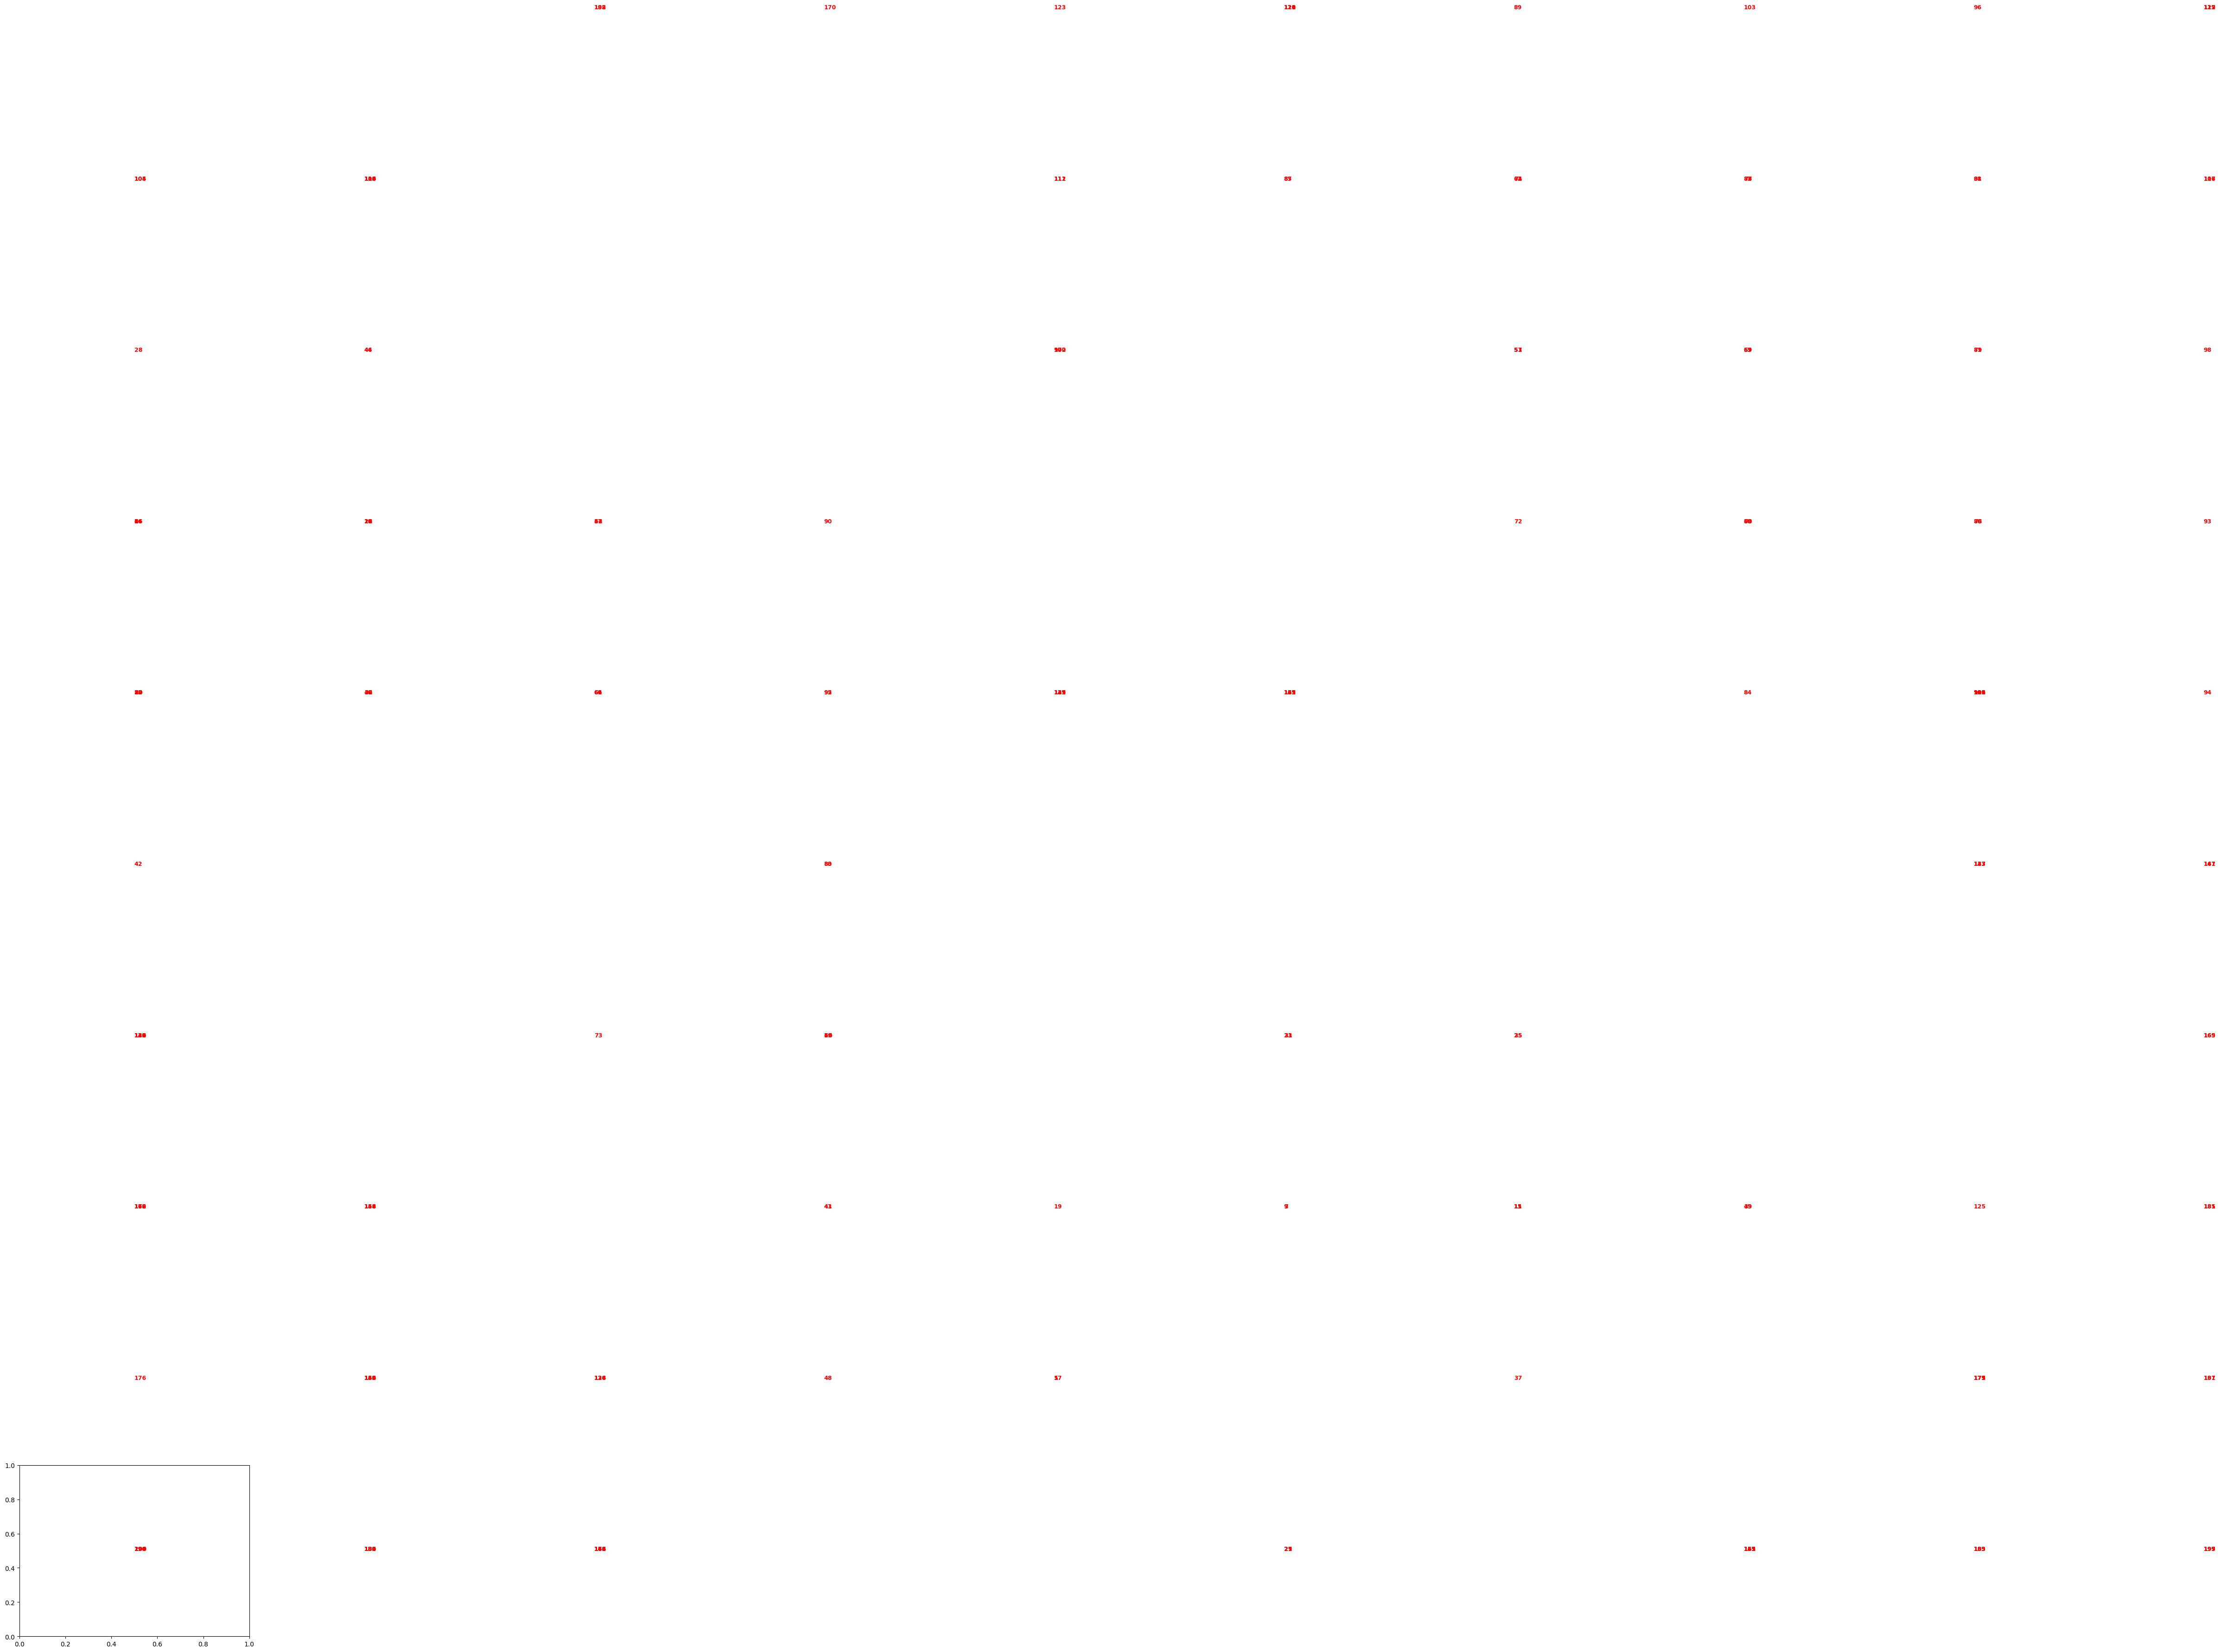

In [9]:
import matplotlib.pyplot as plt

# Visualizing the results
plt.bone()  # Sets the background to grayscale

# Mapping each data point to the corresponding node
for i, x in enumerate(X_scaled):
    w = som.winner(x)  # Get the winning node for each customer
    plt.text(w[0] + 0.5, w[1] + 0.5, str(i+1), color='r', fontdict={'weight': 'bold', 'size': 9})

plt.show()


# Visualize the SOM

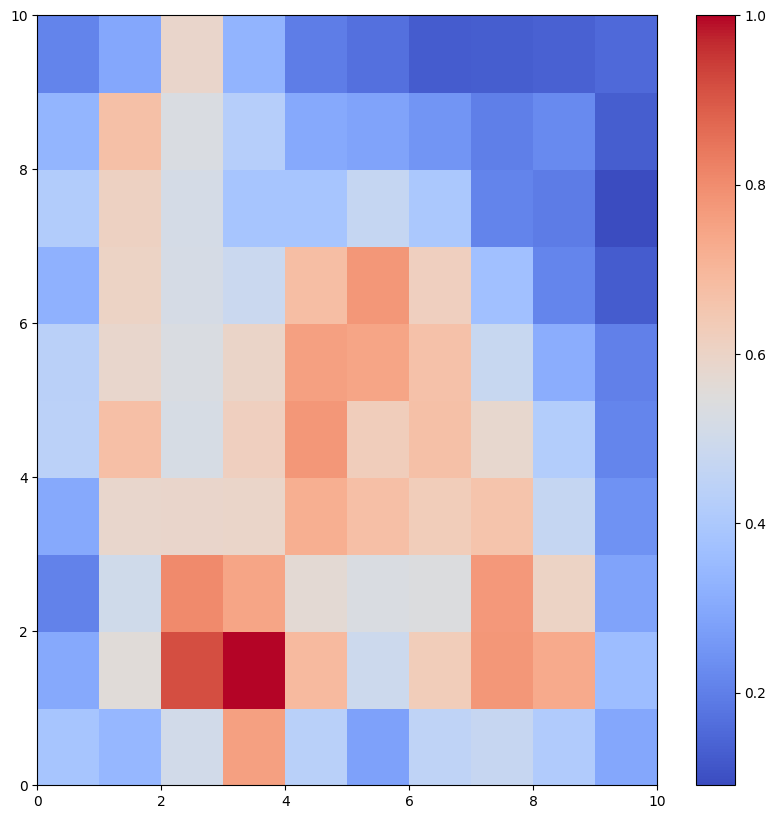

In [10]:
# Visualize the SOM (distance map)
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # Plot the U-Matrix
plt.colorbar()
plt.show()
